# Lets do some modifications to the methods they have used in the research  !!! 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import timeit
import datetime as dt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import NearestCentroid

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.data')   #importing the dataset 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
1000025    698 non-null int64
5          698 non-null int64
1          698 non-null int64
1.1        698 non-null int64
1.2        698 non-null int64
2          698 non-null int64
1.3        698 non-null object
3          698 non-null int64
1.4        698 non-null int64
1.5        698 non-null int64
2.1        698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
1000025    698 non-null int64
5          698 non-null int64
1          698 non-null int64
1.1        698 non-null int64
1.2        698 non-null int64
2          698 non-null int64
1.3        698 non-null object
3          698 non-null int64
1.4        698 non-null int64
1.5        698 non-null int64
2.1        698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# DATA PREPROCESSING

In [5]:
#adding columns 
data.columns = [ 'Sample code number',
                'Clump Thickness',
                'Uniformity of Cell Size',
               'Uniformity of Cell Shape',
               'Marginal Adhesion',
               'Single Epithelial Cell Size',
               'Bare Nuclei',
               'Bland Chromatin',
               'Normal Nucleoli',
               'Mitoses',
               'Class']  

In [6]:
data.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample code number             698 non-null int64
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [8]:
#sample code number is not needed so we are dropping that out 

data = data.drop('Sample code number',axis = 1 )

In [9]:
data.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4
5,1,1,1,1,2,10,3,1,1,2
6,2,1,2,1,2,1,3,1,1,2
7,2,1,1,1,2,1,1,1,5,2
8,4,2,1,1,2,1,2,1,1,2
9,1,1,1,1,1,1,3,1,1,2


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 10 columns):
Clump Thickness                698 non-null int64
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
Class                          698 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [11]:
#according to the dataset source missing values are marked as '?' marks

#missingvlauecounts

l = len(data.columns)

for i in range(l):
    to_check_col = data.iloc[:,i]    
    null_list = to_check_col.isin(['?']).sum(axis = 0)
    print(data.columns[i],"\t:",null_list)

Clump Thickness 	: 0
Uniformity of Cell Size 	: 0
Uniformity of Cell Shape 	: 0
Marginal Adhesion 	: 0
Single Epithelial Cell Size 	: 0
Bare Nuclei 	: 16
Bland Chromatin 	: 0
Normal Nucleoli 	: 0
Mitoses 	: 0
Class 	: 0


## Instead of dropping null values lets fill them with the mode of the collumn 

### why mode ? 

###### all the attributes have integer values  between 1-10 

In [12]:
data.replace('?', np.nan, inplace=True) #missingvalue "?" replace with null count
data.isnull().sum() #confirming is there any missing values 

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [13]:
#Create the Mode Data frame 
data_mode=data.mode()
#simply using a forloop with object 
for x in data.columns.values:
     data[x]=data[x].fillna(value=data_mode[x].iloc[0])

In [14]:
#Confirming is there not any missing values
data.isnull().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [15]:
data.Class.unique() #target class variable values

array([2, 4], dtype=int64)

In [16]:
data['Class'] = data['Class'].map({4:1,2:0})  #replacing variables with 1 and zero 
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [17]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000,698.000000
mean,4.416905,3.137536,3.210602,2.809456,3.217765,3.438395,2.869628,1.590258,0.345272
std,2.817673,3.052575,2.972867,2.856606,2.215408,2.440056,3.055004,1.716162,0.475798
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


 ## Selecting the features with the corralation annalysis 

In [18]:
corr = data.corr()
corr.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.645366,0.655089,0.486699,0.522108,0.558511,0.536176,0.350176,0.716509
Uniformity of Cell Size,0.645366,1.000000,0.906814,0.705397,0.751674,0.755824,0.722699,0.458548,0.817772
Uniformity of Cell Shape,0.655089,0.906814,1.000000,0.682871,0.719524,0.736066,0.719272,0.438756,0.818794
Marginal Adhesion,0.486699,0.705397,0.682871,1.000000,0.599402,0.666759,0.603132,0.417476,0.696605
Single Epithelial Cell Size,0.522108,0.751674,0.719524,0.599402,1.000000,0.616108,0.628704,0.478975,0.682618


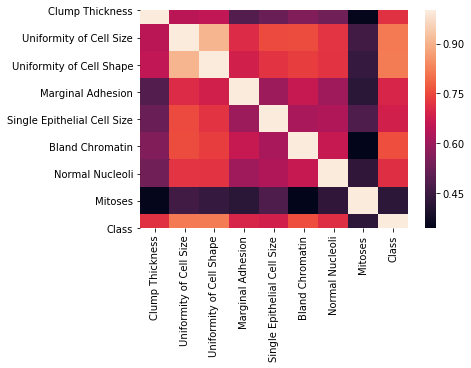

In [19]:
sns.heatmap(corr)   #visualizing the corr via heatmap

In [20]:
#Correlation with output variable
cor_target = abs(corr['Class'])
#checking less correlated features
irelevant_features = cor_target[cor_target<0.7]
irelevant_features

Marginal Adhesion              0.696605
Single Epithelial Cell Size    0.682618
Mitoses                        0.423008
Name: Class, dtype: float64

In [21]:
#drooping less corralated features 

list = ['Mitoses','Marginal Adhesion','Single Epithelial Cell Size']
df = data.drop(list,axis = 1 )

In [22]:
df.head(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,5,4,4,10,3,2,0
1,3,1,1,2,3,1,0
2,6,8,8,4,3,7,0
3,4,1,1,1,3,1,0
4,8,10,10,10,9,7,1
5,1,1,1,10,3,1,0
6,2,1,2,1,3,1,0
7,2,1,1,1,1,1,0
8,4,2,1,1,2,1,0
9,1,1,1,1,3,1,0


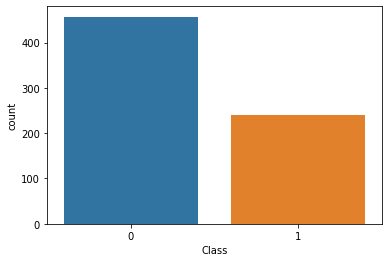

In [23]:
sns.countplot(df['Class'],label="Count")

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

# DATA MODELING WITH NEW ML MODELS

### First we are going to find out the accuracies , precision , recall , f1_score for 5 different models and best one out of that five model will be used to parameter turing

### Following Function was written to calculate the all the performance matrics mentioned before at once. Then It will be easy to visulaize those results from the once place 

In [25]:
def calc_metrics(model_object, X_test, y_test,test_start_timer, test_stop_timer,training_start_timer, training_stop_timer):
  
  y_pred = model_object.predict(X_test)
  
  report_test_accuracy = accuracy_score(y_test, y_pred)
  report_conf_matrix = confusion_matrix(y_test, y_pred)
  report_precision_rate = precision_score(y_test, y_pred)
  report_recall_rate = recall_score(y_test, y_pred)
  report_f1 = f1_score(y_test, y_pred)
  
  performance_metrics = {'test_accuracy': report_test_accuracy,\
                         'confusion_matrix': report_conf_matrix,\
                         'precision': report_precision_rate,\
                         'recall': report_recall_rate,\
                         'f1': report_f1,\
                         'testing_time':test_stop_timer - test_start_timer,\
                         'training_time': training_stop_timer - training_start_timer,\
                         'total_time':test_stop_timer-training_start_timer                       
                        }
  return performance_metrics

### I have used six different ML models

1. Support Vector Machine 
2. Naiive Bayes
3. Linear Descriminant 
4. Distance to mean Classifier
5. KNeighborsClassifier
6. Fuzzy c-means 
   

In [26]:
#initializing the models


svm_model=SVC() 
bayes_model = GaussianNB()
lda = LinearDiscriminantAnalysis()
dtm = NearestCentroid()
knn_model = KNeighborsClassifier()
random_forest_model = RandomForestClassifier(n_estimators=100, max_depth=20,random_state=7) 

#model array 
models = [svm_model,random_forest_model,bayes_model,lda,dtm,knn_model]

#emphty array to store clasiifier score
classifier_scores=[]


for i in models:
    w = timeit.default_timer() 
    i.fit(X_train, y_train) #train models in models array  (one by one)
    x = timeit.default_timer()
    predict=i.predict(X_test) # test the models in the models array (one by one)
    y=timeit.default_timer() #test_stop_timer
    classifier_scores.append(calc_metrics(i, X_test, y_test,x,y,w,x)) #classifier scores as a data array


#converting classifier score array to a dataframe    

df_model_performance = pd.DataFrame(classifier_scores, \
                                    index=['Support Vector Machine', 'RandomForest', \
                                           'Naiive Bayes', 'Linear Descriminant', 'Distance to mean Classifier', \
                                           'KNeighborsClassifier'\
                                          ]\
                                   )



C:\Users\Thraka\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Results 

In [27]:
df_model_performance

,test_accuracy,confusion_matrix,precision,recall,f1,testing_time,training_time,total_time
Support Vector Machine,0.957143,"[[173, 10], [2, 95]]",0.904762,0.979381,0.940594,0.006087,0.098934,0.105021
RandomForest,0.971429,"[[180, 3], [5, 92]]",0.968421,0.948454,0.958333,0.017338,0.166082,0.183420
Naiive Bayes,0.960714,"[[176, 7], [4, 93]]",0.930000,0.958763,0.944162,0.001387,0.002087,0.003474
Linear Descriminant,0.957143,"[[182, 1], [11, 86]]",0.988506,0.886598,0.934783,0.002495,0.004898,0.007393
Distance to mean Classifier,0.960714,"[[181, 2], [9, 88]]",0.977778,0.907216,0.941176,0.002775,0.003234,0.006010
KNeighborsClassifier,0.982143,"[[181, 2], [3, 94]]",0.979167,0.969072,0.974093,0.027542,0.003952,0.031494


#### According to the above table KNN is giving higher accuracy than other classifiers. so here we are going to continue with KNN classifier

# Validating and  Optimizing the Result of the Best Model 

### We have to find the best 'k' value for the KNN model. we will use a graph for that

In [28]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
trn_accuracy =np.empty(len(neighbors))
tst_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    trn_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    tst_accuracy[i] = knn.score(X_test, y_test) 

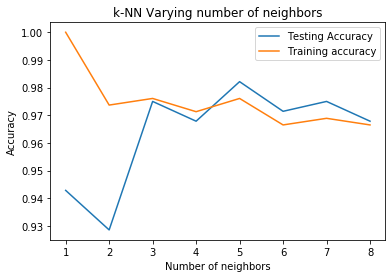

In [29]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, tst_accuracy, label='Testing Accuracy')
plt.plot(neighbors, trn_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### k=5 as choosen according to the above graph

In [30]:
#according to the plot k=5 giving most test accuracy so we are going to use that
#Setup a knn classifier with k neighbors
knn_c = KNeighborsClassifier(n_neighbors=5)
#Fit the model
knn_c.fit(X_train,y_train)
knn_c.score(X_test,y_test)

0.9821428571428571

In [31]:
y_predict = knn_c.predict(X_test)   #testing the model

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))    #getting classification report

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       183
           1       0.98      0.97      0.97        97

    accuracy                           0.98       280
   macro avg       0.98      0.98      0.98       280
weighted avg       0.98      0.98      0.98       280



In [33]:
X = df.drop(columns=['Class'])
y = df['Class']

### Accuracy and other metrics have been increased.  But this kind of accuracy wil be take our doubt about overfitting so we have perform the cross validation. I have used Kfold cross validation for this 


In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from statistics import *

cv = KFold(n_splits=7, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(knn_c, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# report performance
print('all cross validation score array for K=7: \n \n',scores,'\n')
print('Accuracy: %.3f(mean), %.3f(std)' % (mean(scores), stdev(scores)))

all cross validation score array for K=7: 
 
 [0.97       0.97       0.92       0.94       0.98       0.97979798
 0.98989899] 

Accuracy: 0.964(mean), 0.025(std)


## Fuzzy c-means  model testing 

For this I have used the fuzzy-c-means package is available in PyPI.



In [35]:
from fcmeans import FCM

In [36]:
# displaying the datatypes 
display(df.dtypes)   
# converting 'Weight' from float to int 
df['Bare Nuclei'].astype(str).astype(int)  
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)
# displaying the datatypes 
display(df.dtypes) 

Clump Thickness              int64
Uniformity of Cell Size      int64
Uniformity of Cell Shape     int64
Bare Nuclei                 object
Bland Chromatin              int64
Normal Nucleoli              int64
Class                        int64
dtype: object

Clump Thickness             int64
Uniformity of Cell Size     int64
Uniformity of Cell Shape    int64
Bare Nuclei                 int32
Bland Chromatin             int64
Normal Nucleoli             int64
Class                       int64
dtype: object

#### Deviding data in to the features and target 

In [37]:
df_x= data.iloc[:,1:9]
df_y= data.iloc[:,9:10]
df_y=pd.Series.ravel(df_y)

In [38]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 8 columns):
Uniformity of Cell Size        698 non-null int64
Uniformity of Cell Shape       698 non-null int64
Marginal Adhesion              698 non-null int64
Single Epithelial Cell Size    698 non-null int64
Bare Nuclei                    698 non-null object
Bland Chromatin                698 non-null int64
Normal Nucleoli                698 non-null int64
Mitoses                        698 non-null int64
dtypes: int64(7), object(1)
memory usage: 43.8+ KB


In [39]:
df_y

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,

## Model training and testing Implmentations 

Since this is a clustering algorythem I am doing  PCA  for features in here.  The main idea of PCA is
to reduce the dimensionality of a data set consisting of many variables correlated with each other.

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_x=pca.fit_transform(df_x)

## plotting the clusters 

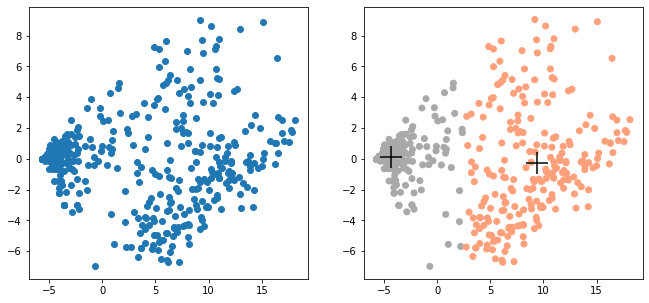

In [50]:
fcm = FCM(n_clusters=2)
fcm.fit(df_x)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(df_x)

color_theme = np.array(['darkgray','lightsalmon'])
# relabel = np.choose(fcm_labels,[2,0,1]).astype(np.int64)

# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(df_x[:,0], df_x[:,1])
axes[1].scatter(df_x[:,0], df_x[:,1], c=color_theme[fcm_labels])
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='#000000')
plt.show()

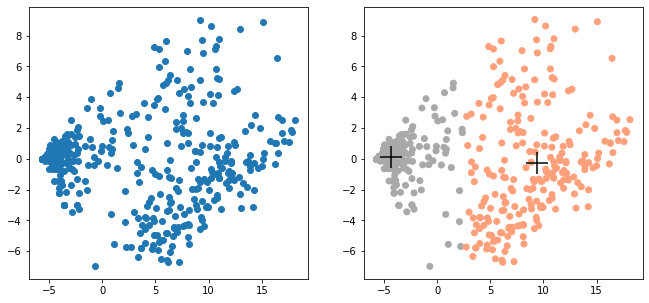

In [51]:
# plot result
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(df_x[:,0], df_x[:,1])
axes[1].scatter(df_x[:,0], df_x[:,1], c=color_theme[fcm_labels])
axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='#000000')
plt.show()

In [42]:
# df_predictions = pd.DataFrame(fcm_labels)
# df_Actual=pd.DataFrame(df_y)

## Results

In [43]:
print(classification_report(df_y,fcm_labels))    #getting classification report

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       457
           1       0.95      0.90      0.92       241

    accuracy                           0.95       698
   macro avg       0.95      0.94      0.94       698
weighted avg       0.95      0.95      0.95       698



In [44]:
# df_predictions.columns =['Predicted'] 
# df_Actual.columns =['Actual'] 
# df_summery = df_Actual.add(df_predictions, fill_value=0)
# df_summery

In [45]:
# df_confusion=df_summery.groupby(["Actual", "Predicted"]).size().reset_index(name="Counts")
# df_confusion.index = ['True Negative', 'True positive', 'Flase Negative', 'Flase Positive'] 
# df_confusion=df_confusion.drop(columns=["Actual","Predicted"])
# df_confusion

In [46]:
# Accuracy = (446+11)/697
# Accuracy